In [1]:
# Use package versions builtin to this repository.
import Pkg
Pkg.activate(@__DIR__)
Pkg.instantiate()

using Flux, Flux.Data.MNIST, Images, Statistics
using Flux: onehotbatch, argmax, crossentropy, throttle, onecold
using Base.Iterators: repeated, partition

  Updating registry at `~/.julia/registries/General`
  Updating git-repo `https://github.com/JuliaRegistries/General.git`


In [2]:
# Disable GPU since this is running on my laptop
gpu(x) = x

# To use GPU code, uncomment the next two lines
# using CuArrays
# gpu(x) = cu(x)

gpu (generic function with 1 method)

,,,,,,,,,

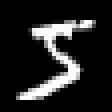
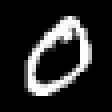
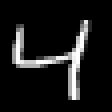
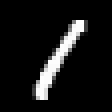
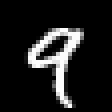
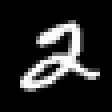
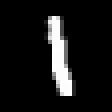
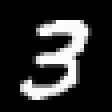
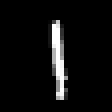
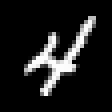

In [26]:
imgs = MNIST.images()
labels = collect(onehotbatch(MNIST.labels(), 0:9)) |> gpu
imgs[1:10]

In [4]:
# Partition into batches of size 1,000
train = [(gpu(cat(float.(imgs[i])...; dims=4)), labels[:,i])
         for i in partition(1:60_000, 1000)]

# Prepare test set (first 1,000 images)
tX = gpu(cat(float.(MNIST.images(:test)[1:1000])...; dims=4))
tY = gpu(onehotbatch(MNIST.labels(:test)[1:1000], 0:9));

In [9]:
m = Chain(
  Conv((2,2), 1=>16, relu),
  x -> maxpool(x, (2,2)),
  Conv((2,2), 16=>8, relu),
  x -> maxpool(x, (2,2)),
  x -> reshape(x, :, size(x, 4)),
  Dense(288, 10), softmax)

m = gpu(m)

loss(x, y) = crossentropy(m(x), y)

loss (generic function with 1 method)

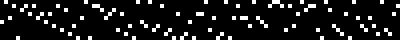

In [10]:
Gray.(collect(labels[:,1:100]))

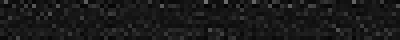

In [14]:
Gray.(collect(m(train[1][1]).data)[:,1:100])

In [12]:
evalcb = throttle(5) do
    display(Gray.(collect(m(train[1][1]).data)[:,1:100]))
end

(::getfield(Flux, Symbol("#throttled#18")){getfield(Flux, Symbol("##throttled#10#14")){Bool,Bool,getfield(Main, Symbol("##23#24")),Int64}}) (generic function with 1 method)

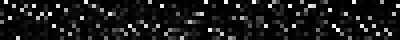

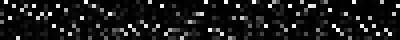

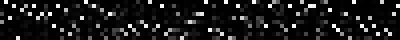

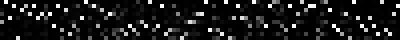

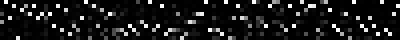

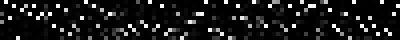

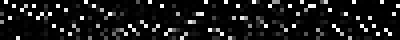

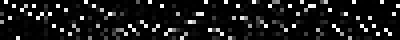

In [21]:
Flux.train!(loss, train, ADAM(params(m)), cb = evalcb)

Test set accuracy.

In [22]:
mean(onecold(m(tX)) .== onecold(tY))

0.836